# Wrangle and Analyze Data: WeRateDogs

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

*(The code below is for generating the Table of Content)*

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js') 

<IPython.core.display.Javascript object>

## 1st Step: Gathering Data

### Import packages and config some features:

In [2]:
import pandas as pd
import requests
import numpy as np

# Packages for the file obtained from Twitter API:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Package for visualization purposes:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### First source and format:

* **Source**: file already downloaded
* **Format**: 'csv'
* **Name of the file**: 'twitter-archive-enhanced.csv'

In [3]:
# First Data Frame
df_1=pd.read_csv('twitter-archive-enhanced.csv')
display(df_1.head(3))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Second source and format:

* **Source**: url
* **Format**: 'tsv'
* **Name of the file**: 'image_predictions.tsv'

I found two ways to read the data. The first one is reading the url without saving a 'tsv' file:

    from io import StringIO
    url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
    response = requests.get(url).text
    df_2 = pd.read_csv(StringIO(response), sep='\t')
    
And the second one is storing it in the  disc. I executed the second option:

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open  ('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
df_2 = pd.read_csv('image_predictions.tsv', sep='\t')
display(df_2.head(3))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


### Third source and format:

* **Source**: Twitter API
* **Format**: 'txt'
* **Name of the file**: 'tweet-json.txt'

In this section it was used the code given by Udacity from the file 'twitter-api.py'

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

With the length of tweet ids it can be checked if all the tweets were gathered:

In [5]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

* The result of this step was a 'txt' file with missing values in tweet id's. For example, number 20 `tweet_id` says 'Fail': ![alt text](capture_01.png)
* This also can be seen in the number of 'Fail' obtained in the `fails_dict`: ![alt text](capture_02.png)
* The code above took me around 35 minutes to be executed (2108.9 seconds): ![alt text](capture_03.png)
* Due to this results it will be used the file given by Udacity that contains more tweet id's than the file obtained above.

In [6]:
with open ('tweet_json.txt') as file: 
    data = [json.loads(line) for line in file]
df_3 = pd.DataFrame(data)
display(df_3.head(3))

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN


## 2nd Step: Assessing Data

Looking for **data quality issues** (completeness, validity, accuracy, consistency) and **tidiness issues**

### Visual Assessment

#### Data Frame 1: Twitter Archive Enhanced

In [7]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
734,781251288990355457,NaN,NaN,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He just got yelled at for goin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781251288...,11,10,Oakley,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None
308,835574547218894849,NaN,NaN,2017-02-25 19:37:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eli. He works backstage at Bone Jovi c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835574547...,11,10,Eli,None,None,None,None
612,796904159865868288,NaN,NaN,2016-11-11 02:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Tyrone. He's a leaf wiz...,6.873173e+17,4.196984e+09,2016-01-13 16:56:30 +0000,https://twitter.com/dog_rates/status/687317306...,11,10,Tyrone,None,None,None,None
1094,736736130620620800,NaN,NaN,2016-05-29 01:49:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chadrick. He's gnarly af 13/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736736130...,13,10,Chadrick,None,None,None,None
798,772877495989305348,NaN,NaN,2016-09-05 19:22:09 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",You need to watch these two doggos argue throu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772877495...,11,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
694,786729988674449408,NaN,NaN,2016-10-14 00:47:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Oakley. He has no idea ...,7.594477e+17,4.196984e+09,2016-07-30 17:56:51 +0000,https://twitter.com/dog_rates/status/759447681...,11,10,Oakley,None,None,None,None
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
1875,675113801096802304,NaN,NaN,2015-12-11 00:44:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zuzu. He just graduated college. Astute p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675113801...,10,10,Zuzu,None,None,pupper,None


#### Data Frame 2: Image Predictions

In [8]:
df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
514,676237365392908289,https://pbs.twimg.com/media/CWJ6Sc-WwAAlpI6.jpg,1,French_bulldog,0.961996,True,Chihuahua,0.021793,True,Boston_bull,0.006916,True
1231,745789745784041472,https://pbs.twimg.com/media/ClmT0KHWkAAXbhy.jpg,1,Pekinese,0.984267,True,Shih-Tzu,0.008942,True,cocker_spaniel,0.001928,True
335,672205392827572224,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,False,crate,0.035376,False,pug,0.003267,True
1023,710283270106132480,https://pbs.twimg.com/media/Cdtu3WRUkAAsRVx.jpg,2,Shih-Tzu,0.932401,True,Lhasa,0.030806,True,Tibetan_terrier,0.008974,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
781,689999384604450816,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True,English_springer,0.129830,True,pug,0.073806,True
1711,818536468981415936,https://pbs.twimg.com/media/C1wGkYoVQAAuC_O.jpg,1,swing,0.999403,False,Welsh_springer_spaniel,0.000062,True,bow,0.000030,False
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False


#### Data Frame 3: Twitter API

In [9]:
pd.set_option('display.max_columns', None)
df_3.sample(8)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
785,Sat Sep 10 23:54:11 +0000 2016,774757898236878852,774757898236878852,This is Finley. She's a Beneboop Cumbersplash....,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774757887117852673, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2035,9462,False,False,False,False,en,NaN,NaN,NaN,NaN
2251,Fri Nov 20 19:55:30 +0000 2015,667793409583771648,667793409583771648,Dogs only please. Small cows and other non can...,False,"[0, 119]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667793397835542529, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,358,736,False,False,False,False,en,NaN,NaN,NaN,NaN
2108,Sat Nov 28 03:31:48 +0000 2015,670444955656130560,670444955656130560,This is Paull. He just stubbed his toe. 10/10 ...,False,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670444949847023616, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,2153,7120,False,False,False,False,en,NaN,NaN,NaN,NaN
400,Thu Jan 26 17:02:56 +0000 2017,824663926340194305,824663926340194305,This is Wilson. Named after the volleyball. He...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 824663919851687936, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1993,11113,False,False,False,False,en,NaN,NaN,NaN,NaN
497,Sun Dec 25 21:12:41 +0000 2016,813130366689148928,813130366689148928,I've been informed by multiple sources that th...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.131273e+17,813127251579564032,4.196984e+09,4196983835,dog_rates,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,513,4968,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
936,Wed Jul 13 18:26:16 +0000 2016,753294487569522689,753294487569522689,This is Ace. He's a window washer. One of the ...,False,"[0, 75]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 753294480162295809, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1191,3758,False,False,False,False,en,NaN,NaN,NaN,NaN
805,Sat Sep 03 16:04:27 +0000 2016,772102971039580160,772102971039580160,This is Penny. She's an OU cheerleader. About ...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772102964165111808, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,1065,4448,False,False,False,False,en,NaN,NaN,NaN,NaN
1931,Tue Dec 08 00:15:09 +0000 2015,674019345211760640,674019345211760640,This is Acro. You briefly see her out of the c...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674019340715446272, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,340,1208,

* At first glance it seems that in `df_1` and `df_3` there are columns with `NaN` values.
* Also in `df_1` there are dogs without 'name' and 'dog stage' (doggo, floofer, pupper, puppo). Also, the columns for 'dog stage' have tidiness issues.
* It can be verified that in `df_2` the algorithm works (it can identify a dog among others that do not)

### Programmatic Assessment

#### Data Frame 1: Twitter Archive Enhanced

In [10]:
# Number 1 tidiness issue: in 'stage of dog' columns (doggo, floofer, pupper, puppo)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
sum(df_1.duplicated())

0

In [12]:
# Number 1 quality issue: NaN values
df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
df_1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [14]:
# Number 2 quality issue: numerator values out of range
df_1.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [15]:
# Number 3 quality issue: denominator values distinct from 10
df_1.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [16]:
# Number 4 quality issue: dogs without name or valid name ('a')
df_1.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Reptar       1
Blipson      1
Dante        1
Jonah        1
Coopson      1
Name: name, Length: 957, dtype: int64

#### Data Frame 2: Image Predictions

In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# no duplicated rows
sum(df_2.duplicated())

0

In [19]:
# no duplicated tweet id's
sum(df_2.tweet_id.duplicated())

0

In [20]:
# Number 5 quality issue: duplicated 'jpg_url'
sum(df_2.jpg_url.duplicated())

66

In [21]:
# no NaN values
df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
# Number 6 quality issue: sometimes there are animals or objects that are not dogs
# false indicates this is not a dog
df_2.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
# Number 6 quality issue: sometimes there are animals or objects that are not dogs
df_2.groupby(['p1_dog','p2_dog','p3_dog'])['p1_dog'].count()

p1_dog  p2_dog  p3_dog
False   False   False      324
                True        64
        True    False       54
                True       101
True    False   False       43
                True        91
        True    False      155
                True      1243
Name: p1_dog, dtype: int64

In [24]:
df_2[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [25]:
# Number 7 quality issue: lower and upper case
df_2.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
nail                    1
envelope                1
bookshop                1
rapeseed                1
dhole                   1
Name: p1, Length: 378, dtype: int64

In [26]:
# Number 7 quality issue: lower and upper case
df_2.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hotdog                  1
dining_table            1
screw                   1
Gila_monster            1
giant_panda             1
Name: p2, Length: 405, dtype: int64

In [27]:
# Number 7 quality issue: lower and upper case
df_2.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ibex                   1
standard_schnauzer     1
Kerry_blue_terrier     1
desktop_computer       1
rhinoceros_beetle      1
Name: p3, Length: 408, dtype: int64

#### Data Frame 3: Twitter API

In [28]:
# Number 8 quality issue: 'retweeted_status'
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [29]:
# no duplicated tweet id's
sum(df_3.id.duplicated())

0

In [30]:
# Number 9 quality issue: NaN values
df_3.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [31]:
df_3[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Data Quality Issues

1. Presence on `NaN` values in `df_1` in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and presence of columns that do not have value for the case study, such as `timestamp`, `source` and `expanded_urls`.
2. High numerator values in `df_1`.
3. Denominator values distinct from 10 in `df_1`.
4. There are dogs without name or valid name in `df_1`.
5. Duplicated values for column 'jpg_url' in `df_2`.
6. Sometimes there are animals or objects that are not dogs in `df_2`.
7. Lowercase and uppercase mix in breed of dogs columns in `df_2`(columns `p1`, `p2`, `p3`).
8. Presence of rows with retweets, replies and quoted status in `df_3`.
9. Columns without relevant information do not add value in `df_3` (mainly related to reply and quoted status).

### Tidiness Issues

10. 'Stage of dog' columns (`doggo`, `floofer`, `pupper`, `puppo`), must be one variable in `df_1`.
11. In `df_1` `rating_numerator` and `rating_denominator` must be one variable named `rating`
12. Join `df_2` and `df_3` to `df_1`

## 3rd Step: Cleaning Data

Copies of the original pieces of data are made prior to cleaning:

In [32]:
df_1_clean=df_1.copy()
df_2_clean=df_2.copy()
df_3_clean=df_3.copy()

### Data Quality Issues

#### Define: 1) Presence on `NaN` values in `df_1` in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, and presence of columns that do not have value for the case study, such as `timestamp`, `source` and `expanded_urls`

##### Code

In [33]:
# DROP VALUES THAT ARE NOT AN ORIGINAL TWEET.

# Drop rows with values distincts to NaN in columns 'retweeted_status_id', 'retweeted_status_user_id' 
# and 'retweeted_status_timestamp'. That means this is a retweet so must be removed.

# Drop rows with values distincts to NaN in columns 'in_reply_to_status_id' and 'in_reply_to_user_id'.
# That means this is a reply so must be erased.

# First validate that the values we want to drop are correct.
display(df_1_clean[df_1_clean.retweeted_status_id.notnull()].shape)
display(df_1_clean[df_1_clean.in_reply_to_status_id.notnull()].shape)

# The lenght of the non null values are the same for the three columns related with 'retweeted status',
# so we proceed dropping this rows
df_1_clean.drop(df_1_clean[df_1_clean.retweeted_status_id.notnull()].index, inplace=True)

# The lenght of the non null values are the same for the three columns related with 'in reply to',
# so we proceed dropping this rows
df_1_clean.drop(df_1_clean[df_1_clean.in_reply_to_status_id.notnull()].index, inplace=True)


# DROP NAN VALUES AND COLUMNS WITHOUT VALUE FOR THE CASE STUDY.

# Now drop the columns with NaN's that have no value for us, and also the columns we will not use.
df_1_clean = df_1_clean.drop([
                              'in_reply_to_status_id', 
                              'in_reply_to_user_id', 
                              'retweeted_status_id', 
                              'retweeted_status_user_id', 
                              'retweeted_status_timestamp',
                              'timestamp',
                              'source',
                              'expanded_urls'
                             ], axis=1)

(181, 17)

(78, 17)

##### Test

In [34]:
display(df_1_clean.shape)
display(df_1_clean.sample(5))
display(df_1_clean.info())

(2097, 9)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1607,685663452032069632,Meet Brooks. He's confused by the almighty bal...,12,10,Brooks,None,None,None,None
1707,680801747103793152,Great picture here. Dog on the right panicked ...,10,10,None,None,None,None,None
825,769695466921623552,This is Titan. He's trying to make friends. Of...,13,10,Titan,None,None,None,None
223,849412302885593088,This is Noosh. He noticed you were in the show...,12,10,Noosh,None,None,None,None
874,761292947749015552,Meet Bonaparte. He's pupset because it's cloud...,11,10,Bonaparte,None,None,None,None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   text                2097 non-null   object
 2   rating_numerator    2097 non-null   int64 
 3   rating_denominator  2097 non-null   int64 
 4   name                2097 non-null   object
 5   doggo               2097 non-null   object
 6   floofer             2097 non-null   object
 7   pupper              2097 non-null   object
 8   puppo               2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


None

#### Define: 2) Denominator values distinct from 10 in `df_1`.

##### Code

In [35]:
# Visualize denominator values distinct from 10
pd.set_option('display.max_colwidth', None)
df_1_denominator = df_1_clean[df_1_clean['rating_denominator'] != 10]
display(df_1_denominator.shape)
display(df_1_denominator[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

(17, 9)

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [36]:
# Manually correct rating numerators and denominators that have been misassigned
rows_to_update = [1068, 1165, 1202, 1662, 2335]
cols_to_update = ['rating_numerator', 'rating_denominator']
values = [[14,10], [13,10], [11,10], [10,10], [9,10]]
df_1_clean.loc[rows_to_update, cols_to_update] = values

##### Test

In [37]:
# Check those ratings manually corrected
df_1_denominator = df_1_clean[df_1_clean['rating_denominator'] != 10]
display(df_1_denominator[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])
display(df_1_denominator.shape)

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110


(12, 9)

#### Define: 3) High numerator values in `df_1`.

##### Code

In [38]:
# Visualize numerator values greater than 20
df_1_numerator = df_1_clean[df_1_clean['rating_numerator'] >= 20]
display(df_1_numerator.shape)
display(df_1_numerator[['tweet_id', 'text', 'rating_numerator']])

(17, 9)

,tweet_id,text,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45


In [39]:
# Manually correct rating numerators that have been misassigned
rows_to_update = [695, 763, 1712]
cols_to_update = ['rating_numerator']
# Round values to the most proximate integer
values = [10, 11, 11]
df_1_clean.loc[rows_to_update, cols_to_update] = values

##### Test

In [40]:
# Check those ratings manually corrected
df_1_numerator = df_1_clean[df_1_clean['rating_numerator'] >= 20]
display(df_1_numerator.shape)
display(df_1_numerator[['tweet_id', 'text', 'rating_numerator']])

(14, 9)

,tweet_id,text,rating_numerator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44


#### Define: 4) There are dogs without name or valid name in `df_1`.

##### Code

In [41]:
# In 'name' column, names that are not capitalized have wrong values, so must be converted to 'None'
df_1_clean.loc[df_1_clean.name.str.islower(),'name']='None'

# In 'name' column replace 'None' with NaN values
df_1_clean.name=df_1_clean.name.replace('None',np.nan)

##### Test

In [42]:
df_1_clean.sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1606,685667379192414208,This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper https://t.co/u427woxFpJ,9,10,Marty,None,None,pupper,None
635,793601777308463104,This is Dobby. I can't stop looking at her feet. 12/10 would absolutely snug https://t.co/LhzPWv6rTv,12,10,Dobby,None,None,None,None
1766,678399652199309312,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,12,10,NaN,None,None,None,None
776,776113305656188928,This is Sampson. He's about to get hit with a vicious draw 2. Has no idea. 11/10 poor pupper https://t.co/FYT9QBEnKG,11,10,Sampson,None,None,pupper,None
648,793120401413079041,"This is Robin. She's desperately trying to do me a frighten, but her tongue drastically decreases her spook value. Still 11/10 great effort https://t.co/sxMrsOZ8zb",11,10,Robin,None,None,None,None
1925,674063288070742018,This is Earl. Earl is lost. Someone help Earl. He has no tags. Just trying to get home. 5/10 hang in there Earl https://t.co/1ZbfqAVDg6,5,10,Earl,None,None,None,None
593,798925684722855936,This is Shadow. He's a firm believer that they're all good dogs. H*ckin passionate about it too. 11/10 I stand with Shadow https://t.co/8yvpacwBcu,11,10,Shadow,None,None,None,None
381,827324948884643840,"This is Ralphie. He's being treated for an overactive funny bone, which is no joke. 12/10 would try to pet with a straight face https://t.co/UU3KqQF5n5",12,10,Ralphie,None,None,None,None
1210,715680795826982913,This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,12,10,Zeus,None,None,None,None
1805,676942428000112642,Who leaves the last cupcake just sitting there? 9/10 https://t.co/PWMqAoEx2a,9,10,NaN,None,None,None,None


#### Define: 5) Duplicated values for column `jpg_url` in `df_2`.

##### Code

In [43]:
# Remove duplicate values and keep the first to appear
df_2_clean = df_2_clean.drop_duplicates(subset=['jpg_url'], keep='first')

##### Test

In [44]:
display(df_2_clean.shape)

(2009, 12)

#### Define: 6) Sometimes there are animals or objects that are not dogs in `df_2`.

##### Code

In [45]:
# I will make the assumption that the first prediction is correct, so 
# I will not take into account what second and third predictions say.

# Remove the 'false' values because that means that the row does not 
# contain data from a dog but from another animal
display(df_2_clean.p1_dog.value_counts())

True     1480
False     529
Name: p1_dog, dtype: int64

In [46]:
# Remove in 'p1_dog' animals different than dogs
df_2_clean.drop(df_2_clean[df_2_clean['p1_dog'] == False].index, inplace=True)

# Rename columns 'p1' and 'p1_conf' 
df_2_clean.rename(columns={'p1': 'predicted_breed', 'p1_conf': 'predicted_confidence'}, inplace=True)

# Delete columns with second and third predictions.
# Also remove 'img_num' and 'p1_dog' columns because those have no value now.
df_2_clean = df_2_clean.drop([
                              'img_num', 
                              'p1_dog', 
                              'p2', 
                              'p2_conf', 
                              'p2_dog',
                              'p3',
                              'p3_conf',
                              'p3_dog'
                             ], axis=1)

##### Test

In [47]:
display(df_2_clean.sample(5))
display(df_2_clean.shape)

,tweet_id,jpg_url,predicted_breed,predicted_confidence
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,Staffordshire_bullterrier,0.610655
1772,827933404142436356,https://pbs.twimg.com/media/C31pCN4UcAAOLNH.jpg,German_shepherd,0.806115
1657,810896069567610880,https://pbs.twimg.com/media/C0DhpcrUAAAnx88.jpg,flat-coated_retriever,0.820804
674,683391852557561860,https://pbs.twimg.com/media/CXvlQ2zW8AAE0tp.jpg,French_bulldog,0.992833
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,Doberman,0.610946


(1480, 4)

#### Define: 7) Lowercase and uppercase mix in `predicted_breed` column in `df_2`.

##### Code

In [48]:
df_2_clean['predicted_breed'] = df_2_clean.predicted_breed.str.capitalize()

##### Test

In [49]:
display(df_2_clean.sample(5))
display(df_2_clean.shape)
display(df_2_clean.info())

,tweet_id,jpg_url,predicted_breed,predicted_confidence
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,Golden_retriever,0.762211
1812,833124694597443584,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,Cardigan,0.710523
146,668627278264475648,https://pbs.twimg.com/media/CUdw9thWsAA4mB9.jpg,French_bulldog,0.965403
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,Lakeland_terrier,0.428275
968,706346369204748288,https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg,Tibetan_mastiff,0.956462


(1480, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1480 non-null   int64  
 1   jpg_url               1480 non-null   object 
 2   predicted_breed       1480 non-null   object 
 3   predicted_confidence  1480 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 57.8+ KB


None

#### Define: 8) Presence of rows with retweets, replies and quoted status in `df_3`.

##### Code

In [50]:
# Validate that the values we want to drop are correct.
display(df_3_clean[df_3_clean.retweeted_status.notnull()].shape)
display(df_3_clean[df_3_clean.in_reply_to_status_id.notnull()].shape)
display(df_3_clean[df_3_clean.quoted_status_id.notnull()].shape)

(179, 31)

(78, 31)

(29, 31)

In [51]:
# Now we proceed dropping this rows

# Retweets
df_3_clean.drop(df_3_clean[df_3_clean.retweeted_status.notnull()].index, inplace=True)
# Replies
df_3_clean.drop(df_3_clean[df_3_clean.in_reply_to_status_id.notnull()].index, inplace=True)
# Quoted Status
df_3_clean.drop(df_3_clean[df_3_clean.quoted_status_id.notnull()].index, inplace=True)

##### Test

In [52]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2069 non-null   object 
 1   id                             2069 non-null   int64  
 2   id_str                         2069 non-null   object 
 3   full_text                      2069 non-null   object 
 4   truncated                      2069 non-null   bool   
 5   display_text_range             2069 non-null   object 
 6   entities                       2069 non-null   object 
 7   extended_entities              1971 non-null   object 
 8   source                         2069 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      object 
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      o

#### Define: 9) Columns without relevant information do not add value in `df_3` .

##### Code

In [53]:
# DROP NAN VALUES AND COLUMNS WITHOUT VALUE FOR THE CASE STUDY.

# Now drop the columns with NaN's that have no value for us, and also the columns we will not use.
df_3_clean = df_3_clean.drop([
    'created_at', 
    'id_str', 
    'full_text', 
    'truncated', 
    'display_text_range', 
    'entities', 
    'extended_entities', 
    'source', 
    'in_reply_to_status_id', 
    'in_reply_to_status_id_str', 
    'in_reply_to_user_id', 
    'in_reply_to_user_id_str', 
    'in_reply_to_screen_name', 
    'user',
    'geo', 
    'coordinates', 
    'place', 
    'contributors',
    'is_quote_status', 
    'favorited', 
    'retweeted', 
    'possibly_sensitive',
    'possibly_sensitive_appealable', 
    'lang', 
    'retweeted_status', 
    'quoted_status_id',
    'quoted_status_id_str', 
    'quoted_status'
], axis=1)

# Rename 'id' column
df_3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

##### Test

In [54]:
display(df_3_clean.sample(5))
display(df_3_clean.shape)
display(df_3_clean.info())

,tweet_id,retweet_count,favorite_count
517,810657578271330305,3057,12192
2016,672139350159835138,792,1876
1054,742161199639494656,1547,4743
1532,689993469801164801,518,1618
477,815966073409433600,9907,25057


(2069, 3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2069 non-null   int64
 1   retweet_count   2069 non-null   int64
 2   favorite_count  2069 non-null   int64
dtypes: int64(3)
memory usage: 64.7 KB


None

### Tidiness Issues

#### Define: 10) 'Stage of dog' columns (`doggo`, `floofer`, `pupper`, `puppo`), must be one variable in `df_1`.

##### Code

In [55]:
# replace all the 'None'
stage_of_dog = ['doggo', 'pupper', 'floofer', 'puppo' ]
for i in stage_of_dog:
        df_1_clean[i] = df_1_clean[i].replace('None', '')
        
# using 'cat' to combine the columns
df_1_clean['stage_of_dog'] = df_1_clean.doggo.str.cat(df_1_clean.floofer).str.cat(df_1_clean.pupper).str.cat(df_1_clean.puppo)

# erase the columns been replaced
df_1_clean=df_1_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

# assign NaN values to empty spaces
df_1_clean.stage_of_dog=df_1_clean.stage_of_dog.replace('', np.nan)

# replacing wrong outputs of 'stage_of_dog'
df_1_clean.loc[df_1_clean.stage_of_dog == 'doggopupper', 'stage_of_dog'] = 'doggo, pupper'
df_1_clean.loc[df_1_clean.stage_of_dog == 'doggopuppo', 'stage_of_dog'] = 'doggo, puppo'
df_1_clean.loc[df_1_clean.stage_of_dog == 'doggofloofer', 'stage_of_dog'] = 'doggo, floofer'

##### Test

In [56]:
df_1_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,stage_of_dog
1762,678643457146150913,Meet Grizz. He just arrived. Couldn't wait until Christmas. Worried bc he saw the swastikas on the carpet. 10/10 https://t.co/QBGwYrT7rv,10,10,Grizz,NaN
1824,676496375194980353,Say hello to Griffin. He's upset because his costume for Halloween didn't arrive until today. 9/10 cheer up pup https://t.co/eoBCjSFajX,9,10,Griffin,NaN
321,834209720923721728,This is Wilson. He's aware that he has something on his face. Waiting for you to get it for him. 12/10 https://t.co/FaeinVjzTZ,12,10,Wilson,NaN
1439,696894894812565505,These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z,9,10,NaN,NaN
729,781955203444699136,This is Chipson. He weighed in at .3 ounces and is officially super h*ckin smol. Space-saving af. 11/10 would snug delicately https://t.co/FjEsk7A1JV,11,10,Chipson,NaN


In [57]:
df_1_clean.stage_of_dog.value_counts()

pupper            221
doggo              72
puppo              23
doggo, pupper       9
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: stage_of_dog, dtype: int64

#### Define: 11) In df_1 `rating_numerator` and `rating_denominator` must be one variable named `rating`

##### Code

In [58]:
# Making the operation to obtain 'rating' variable
df_1_clean['rating']=df_1_clean.rating_numerator/df_1_clean.rating_denominator
df_1_clean=df_1_clean.drop(['rating_numerator','rating_denominator'], axis=1)

##### Test

In [59]:
display(df_1_clean.sample(5))
display(df_1_clean.shape)
display(df_1_clean.info())

,tweet_id,text,name,stage_of_dog,rating
1323,706265994973601792,"This is Kara. She's been trying to solve that thing for 3 days. ""I don't have thumbs,"" she said. 11/10 solid effort https://t.co/lA6a8GefrV",Kara,NaN,1.1
157,861288531465048066,HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g,NaN,NaN,1.3
1394,700002074055016451,This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1,Thumas,NaN,0.9
1615,685268753634967552,This is Hubertson. He's a Carmel Haberdashery. Enjoys long summer days on his boat. Very peaceful pupper. 10/10 https://t.co/vzCl35fKlZ,Hubertson,pupper,1.0
491,813800681631023104,This is Sky. She's learning how to roll her R's. 12/10 cultured af https://t.co/OuaVvVkwJ1,Sky,NaN,1.2


(2097, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      2097 non-null   int64  
 1   text          2097 non-null   object 
 2   name          1390 non-null   object 
 3   stage_of_dog  336 non-null    object 
 4   rating        2097 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 178.3+ KB


None

#### Define: 12) Join `df_2` and `df_3` to `df_1`

##### Code

In [60]:
# I make the assumption of an inner join because I want the lowest amount of missing data 
# (except for columns 'name' and 'stage_of_dog')

# First join 'df_1_clean' with 'df_3_clean'
df_merge_1 = pd.merge(left=df_1_clean, right=df_3_clean, on=['tweet_id'], how='inner')

# And now merging 'df_2_clean' with 'df_merge_1'
final_df_clean = pd.merge(left=df_merge_1, right=df_2_clean, on=['tweet_id'], how='inner')

# Finally converting 'tweet_id' to a string
final_df_clean['tweet_id'] = final_df_clean['tweet_id'].apply(str)


##### Test

In [61]:
# Final results of cleaning process
display(final_df_clean.shape)
display(final_df_clean.info())
display(final_df_clean.isnull().sum())
display(sum(final_df_clean.duplicated()))
display(final_df_clean.sample(5))

(1463, 10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1463 non-null   object 
 1   text                  1463 non-null   object 
 2   name                  1044 non-null   object 
 3   stage_of_dog          227 non-null    object 
 4   rating                1463 non-null   float64
 5   retweet_count         1463 non-null   int64  
 6   favorite_count        1463 non-null   int64  
 7   jpg_url               1463 non-null   object 
 8   predicted_breed       1463 non-null   object 
 9   predicted_confidence  1463 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 125.7+ KB


None

tweet_id                   0
text                       0
name                     419
stage_of_dog            1236
rating                     0
retweet_count              0
favorite_count             0
jpg_url                    0
predicted_breed            0
predicted_confidence       0
dtype: int64

0

,tweet_id,text,name,stage_of_dog,rating,retweet_count,favorite_count,jpg_url,predicted_breed,predicted_confidence
406,786664955043049472,"""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",NaN,NaN,1.2,2996,11957,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,Leonberg,0.512034
1073,679722016581222400,This is Mike. He is a Jordanian Frito Pilates. Frowning because he can't see directly in front of him. 8/10 https://t.co/NL5QJwdEpF,Mike,NaN,0.8,539,1817,https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg,Boxer,0.459604
441,778408200802557953,RIP Loki. Thank you for the good times. You will be missed by many. 14/10 https://t.co/gJKD9pst5A,NaN,NaN,1.4,5023,15135,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,Pembroke,0.848362
576,750026558547456000,Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI,Jax,NaN,1.0,888,2986,https://pbs.twimg.com/media/CmieRQRXgAA8MV3.jpg,Standard_poodle,0.258732
1028,683030066213818368,This is Lulu. She's contemplating all her unreached 2015 goals and daydreaming of a more efficient tomorrow. 10/10 https://t.co/h3ScYuz77J,Lulu,NaN,1.0,832,2370,https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg,Boxer,0.722218


* Finally, there are 1463 rows and 10 columns that will be used for EDA.
* See that there are no duplicated values.
* Also, the only missing values are in name and state of the dog.

## 4th Step: Storing and Acting on Wrangled Data

### Saving the final data frame
Storing the cleaned data set in a `csv` file named  `twitter_archive_master.csv`

In [62]:
final_df_clean.to_csv('twitter_archive_master.csv', index=False)

### Exploratory Data Analysis

In [63]:
final_df_clean.describe()

,rating,retweet_count,favorite_count,predicted_confidence
count,1463.000000,1463.000000,1463.000000,1463.000000
mean,1.092774,2802.971975,9332.433356,0.615043
std,0.179633,4783.379234,12641.104102,0.260249
min,0.200000,16.000000,81.000000,0.044333
25%,1.000000,656.000000,2234.000000,0.392933
50%,1.100000,1451.000000,4531.000000,0.615741
75%,1.200000,3265.500000,11836.000000,0.853345
max,3.428571,79515.000000,132810.000000,0.999956


* To compare **who are the most popular dogs**, a weight will be assigned to each numerical variable. 
* **An assumption has been made**, giving 30% of importance to `rating`, `retweet_count` and `favorite_count`. 
* `predicted_confidence` will be assigned with 10% of importance so **a new aggregated variable will be added**.
* But first of all, a **data normalization** must be made, and the technique used is [z-score](https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475)

In [64]:
# Apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
        
    return df_std

In [65]:
# Call the z_score function
df_final_standardized = z_score(final_df_clean[['rating','retweet_count','favorite_count','predicted_confidence']])

# Obtain the final score using the weights assumed before
df_final_standardized['score'] = 0.3*df_final_standardized['rating'] + 0.3*df_final_standardized['retweet_count'] 
+ 0.3*df_final_standardized['favorite_count'] + 0.1*df_final_standardized['predicted_confidence']

# Drop all normalized columns but keeping'score'
df_final_standardized = df_final_standardized.drop(['rating', 
                                                    'retweet_count', 
                                                    'favorite_count', 
                                                    'predicted_confidence'
                                                   ], axis=1)
display(df_final_standardized.head())

,score
0,0.578827
1,0.274720
2,0.616278
3,0.374808
4,0.305631


In [66]:
# Merge 'df_final_standardized' to  'final_df_clean' by indexes
df_final = pd.merge(final_df_clean, df_final_standardized, left_index=True, right_index=True, how='inner')
display(df_final.head())
display(df_final.info())

# Saving changes for the new column added
df_final.to_csv('twitter_archive_master.csv', index=False)

,tweet_id,text,name,stage_of_dog,rating,retweet_count,favorite_count,jpg_url,predicted_breed,predicted_confidence,score
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,0.578827
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,0.274720
2,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,1.2,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,0.616278
3,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,1.3,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_bay_retriever,0.425595,0.374808
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,Jax,NaN,1.3,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,0.305631


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1462
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1463 non-null   object 
 1   text                  1463 non-null   object 
 2   name                  1044 non-null   object 
 3   stage_of_dog          227 non-null    object 
 4   rating                1463 non-null   float64
 5   retweet_count         1463 non-null   int64  
 6   favorite_count        1463 non-null   int64  
 7   jpg_url               1463 non-null   object 
 8   predicted_breed       1463 non-null   object 
 9   predicted_confidence  1463 non-null   float64
 10  score                 1463 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 177.2+ KB


None

* Finally the dataset is sorted by 'score'. 
* Below are the five most popular dogs.
* Note that some images are captures of videos, that's why sometimes those are blurred and with low quality, but it can be seen in the original tweet.

In [67]:
df_final.sort_values('score',ascending=False).head()

,tweet_id,text,name,stage_of_dog,rating,retweet_count,favorite_count,jpg_url,predicted_breed,predicted_confidence,score
614,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,doggo,1.300000,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,Labrador_retriever,0.825333,5.157243
310,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,Sam,NaN,3.428571,1655,5927,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,Golden_retriever,0.871342,3.828951
324,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Stephan,NaN,1.300000,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,Chihuahua,0.505370,3.721647
639,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaN,doggo,1.300000,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,Eskimo_dog,0.503372,3.454158
247,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,puppo,1.300000,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,3.197332


### Visualizations

#### The most popular Dog Breeds

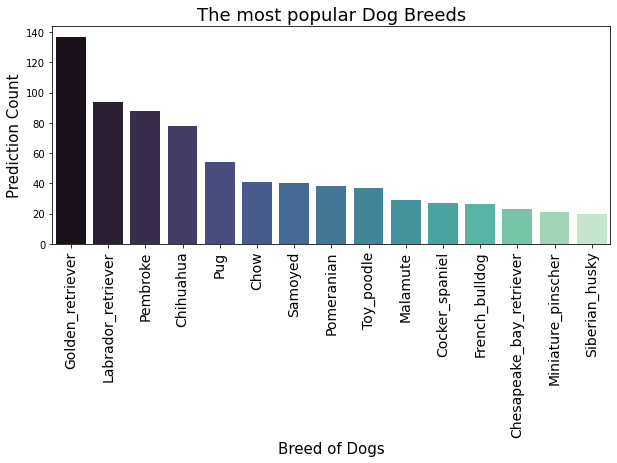

In [68]:
plt.figure(figsize = (10,4))

ax = sns.barplot(
    x = final_df_clean['predicted_breed'].value_counts()[0:15].index, 
    y =final_df_clean['predicted_breed'].value_counts()[0:15], 
    data = final_df_clean, 
    palette="mako"
);

plt.ylabel("Prediction Count",fontsize = 15);
plt.xlabel("Breed of Dogs",fontsize = 15);
plt.title("The most popular Dog Breeds",fontsize = 18);
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);

#### Boxplot, Scatterplot and Kernel Density Estimate (KDE) Analysis

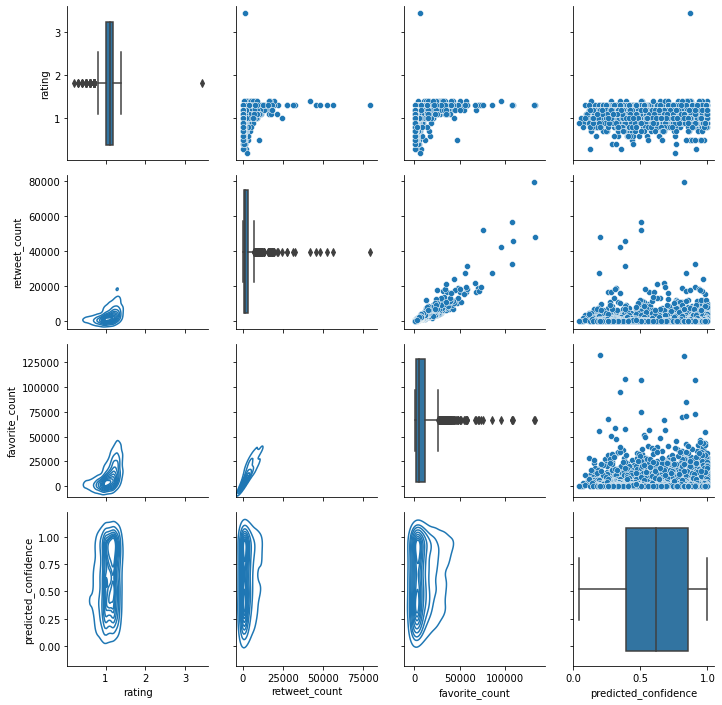

In [69]:
g = sns.PairGrid(final_df_clean);
g.map_diag(sns.boxplot);
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot);

##### Insights
* **Boxplots (main diagonal)**: 
 + `retweet_count` and `favorite_count` are the variables with the biggest amount of outliers. 
 + Meanwhile `predicted_confidence` has no outliers
 + and `rating` has outliers that show values under 1.0 are less common. 
* **Scatterplots (upper diagonal)**:
 + The only variables that have positive correlation are `retweet_count` and `favorite_count`. 
 + It can not be assumed any kind of correlation between the other variables.
* **Kernel Density Estimate(KDE)** 
 + This a method for visualizing the distribution of observations in a dataset, analagous to a [histogram](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).
 + In the case of `retweet_count` and` favorite_count` there is a high density of data represented by concentric lines very close togheter.